<a href="https://colab.research.google.com/github/poralo/digit-recognizer/blob/master/digit_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconnaissance de chiffre à l'aide d'un algorithme CNN

## 1.Introduction
 J'utilise un Sequential Convolutional Neural Network composé de 5 couches pour la reconnaissance de chiffre, entrainé sur la base de données [MNIST](http://yann.lecun.com/exdb/mnist/index.html). J'ai choisi de le développer avec la librairie Tensorflow pour python. Dans un premier temps je vais préparer les données (les images de chiffres écrit à la main) puis je vais modéliser le CNN, l'entrainer et l'évaluer.
 
 Les données sont séparer en 2 fichiers. L'un contient 42k images de chiffres écrit à la main avec leur label. L'autre contient 28k images de chiffres écrit à la main mais n'a pas de label, c'est le fichier utilisé pour la compétition kaggle "digit recognizer".

Ce Notebook sera décomposé en 2 parties principales :
  - La préparation des données
  - La modélisation du CNN, son entrainement et son évaluation
  - L'application sur les données de test et la participation à la compétition kaggle.

## 2.Préparation des données
### Importations des bibliothèques nécessaires

In [0]:
# TensorFlow
import tensorflow as tf

# Helper libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

PATH = "drive/My Drive/Colab Notebooks/digit-recognizer"

### Importations des données

Train size :(42000, 785)
Test size :(28000, 784)


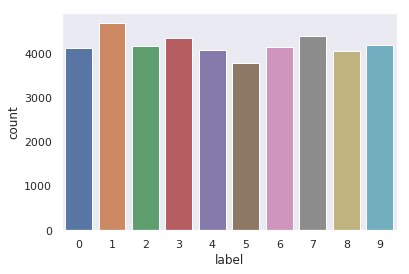

In [89]:
# Import Data
train = pd.read_csv(PATH + "/train.csv")
test = pd.read_csv(PATH + "/test.csv")
print("Train size :{}\nTest size :{}".format(train.shape, test.shape))

# Transform Train and Test into images\labels.
train_images = train.drop(['label'], axis=1) # all pixel values
train_labels = train['label'] # only labels i.e targets digits

sns.countplot(train_labels)
#train_labels.value_counts()

On remarque que le nombre de données est similaire pour les 10 classes

### Vérification des données

In [90]:
# Check the data for null and missing value
print('Train images : \n{}'.format(train_images.isnull().any().describe()))
print('_'*20)
print('Test images : \n{}'.format(test.isnull().any().describe()))

Train images : 
count       784
unique        1
top       False
freq        784
dtype: object
____________________
Test images : 
count       784
unique        1
top       False
freq        784
dtype: object


Il n'y a pas de valeur manquante ou corrompus dans les données.

### Normalisation des données

On normalise les données (valeurs entre 0 et 1) car le CNN converge plus rapidement avec des valeurs [0, 1] que [0, 255].

In [0]:
# Normalize the data
train_images = train_images / 255.0
test = test / 255.0

### Redimensionnement des données

On redimensionne les images en 3 dimensions : 
  - hauteur = 28px
  - largeur = 28px
  - canal = 1.  

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
train_images = train_images.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### Séparer les données en 2 catégories : entrainement et validation

In [0]:
# Set the random seed
random_seed = 2

In [0]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=random_seed)

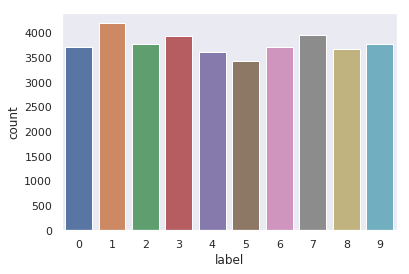

In [95]:
sns.countplot(train_labels)

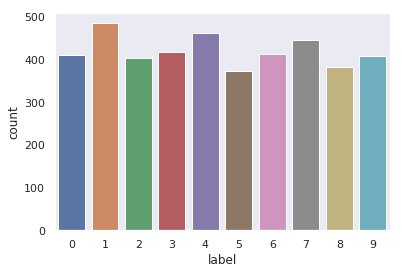

In [96]:
sns.countplot(validation_labels)

### Visualisation de quelques examples des données

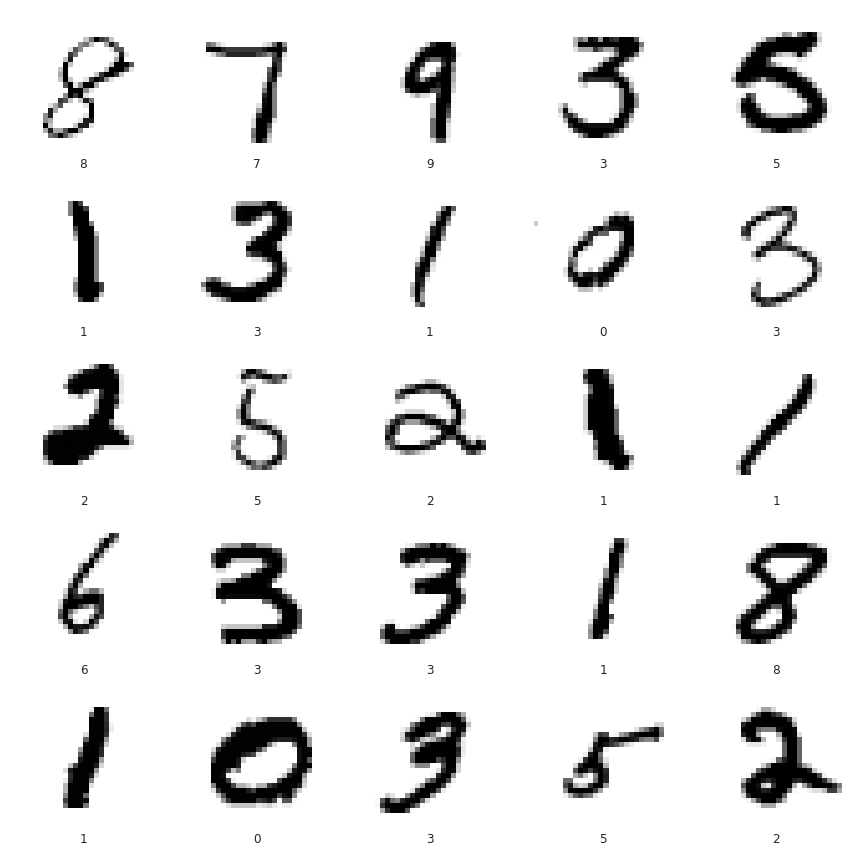

In [97]:
# classes for title

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i][:,:,0], cmap=plt.cm.binary)
    plt.xlabel(train_labels.values[i])
plt.show()

In [98]:
"""# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
train_labels = to_categorical(train_labels, num_classes = 10)"""

'# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])\nfrom keras.utils.np_utils import to_categorical # convert to one-hot-encoding\ntrain_labels = to_categorical(train_labels, num_classes = 10)'

## 3.Mise en place du réseau de neurones

### Définition du model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrainement du model

In [107]:
epochs = 5
batch_size = 86

history = model.fit(train_images, train_labels.values, batch_size = batch_size, epochs = epochs, 
                    validation_data = (validation_images, validation_labels.values), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 - 251s - loss: 0.2681 - acc: 0.9126 - val_loss: 0.0562 - val_acc: 0.9838
Epoch 2/5
37800/37800 - 251s - loss: 0.0809 - acc: 0.9758 - val_loss: 0.0509 - val_acc: 0.9857
Epoch 3/5
37800/37800 - 253s - loss: 0.0600 - acc: 0.9820 - val_loss: 0.0403 - val_acc: 0.9860
Epoch 4/5
37800/37800 - 251s - loss: 0.0484 - acc: 0.9857 - val_loss: 0.0325 - val_acc: 0.9912
Epoch 5/5
37800/37800 - 251s - loss: 0.0429 - acc: 0.9872 - val_loss: 0.0344 - val_acc: 0.9914


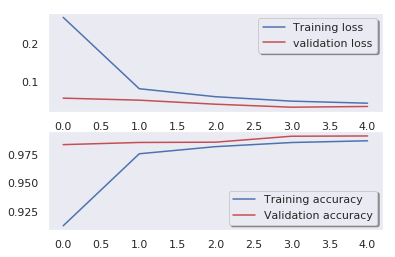

In [109]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

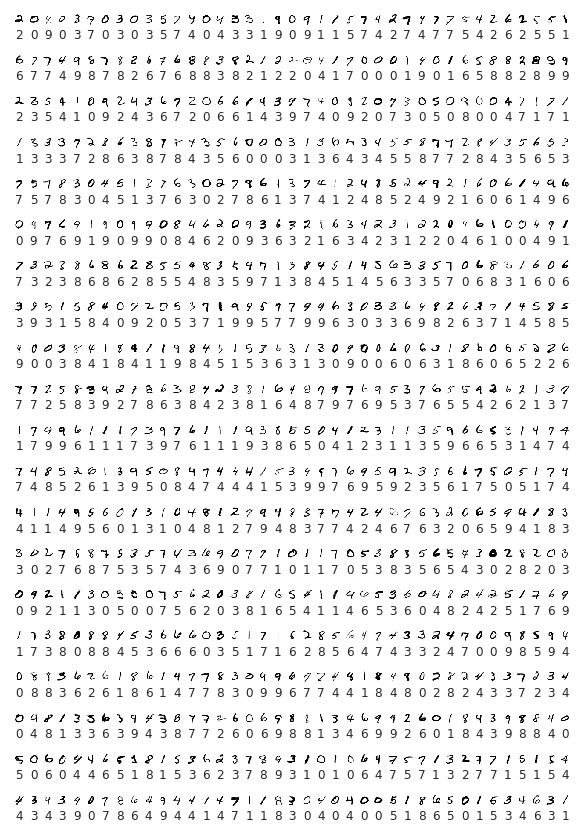

In [120]:
plt.figure(figsize=(10,15))
for i in range(780):
    plt.subplot(20,39,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[i][:,:,0], cmap=plt.cm.binary)
    plt.xlabel(results.values[i])
plt.show()